In [1]:
import yfinance as yf
import datetime
import pandas as pd
import seaborn
import dateutil
import collections
import bs4 as bs4
import requests

Get AAPL Data

In [68]:
aapl = yf.Ticker("aapl").history(period = "5y")

/Users/aman2/anaconda3/envs/ollama_lang_chrome_test/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [69]:
assert not aapl.empty

<Axes: xlabel='Date', ylabel='Close'>

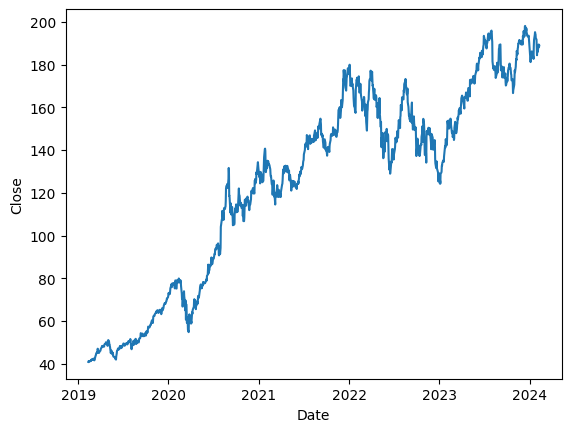

In [70]:
seaborn.lineplot(data = aapl, x = "Date", y = "Close")

In [71]:
aapl = aapl.reset_index()
aapl["Date"] = aapl["Date"].dt.date
aapl.set_index("Date")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-02-11,41.219945,41.258503,40.786177,40.829552,83973600,0.0,0.0
2019-02-12,40.991015,41.207897,40.894620,41.181389,89134000,0.0,0.0
2019-02-13,41.301874,41.564543,40.947630,41.010284,89960800,0.0,0.0
2019-02-14,40.897025,41.270544,40.817501,41.159695,87342800,0.0,0.0
2019-02-15,41.268142,41.376583,40.906669,41.068127,98507200,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-05,188.149994,189.250000,185.839996,187.679993,69668800,0.0,0.0
2024-02-06,186.860001,189.309998,186.770004,189.300003,43490800,0.0,0.0
2024-02-07,190.639999,191.050003,188.610001,189.410004,53439000,0.0,0.0


Getting News

In [17]:
googlenews = GoogleNews.GoogleNews(period='5y',lang='en', region='US')

In [21]:
googlenews.get_news('APPLE')

In [22]:
res = googlenews.results()

In [23]:
len(res)

110

In [13]:
links = googlenews.get_links()

In [14]:
for l in links:
    print(l)

https://www.businessinsider.com/apple-vision-pro-experiment-brain-virtual-reality-side-effect-2024-2&ved=2ahUKEwjNos2LrqOEAxXXJ0QIHUV6Ax4QxfQBegQIAhAC&usg=AOvVaw0jl-VmItUlC2dPEvSIajdJ
https://www.businessinsider.com/using-apple-vision-pro-for-the-day-productivity-2024-2&ved=2ahUKEwjNos2LrqOEAxXXJ0QIHUV6Ax4QxfQBegQICRAC&usg=AOvVaw2nVrRD8ppUGp527fKrIF-9
https://www.cbsnews.com/essentials/how-to-watch-the-apple-music-super-bowl-lviii-halftime-show/&ved=2ahUKEwjNos2LrqOEAxXXJ0QIHUV6Ax4QxfQBegQIBRAC&usg=AOvVaw3ila7VxhRU0DUsikf3Eh3x
https://timesofindia.indiatimes.com/gadgets-news/openai-ceo-sam-altman-says-apple-vision-pro-is-second-most-impressive-tech-this-is-his-top-pick/articleshow/107582150.cms&ved=2ahUKEwjNos2LrqOEAxXXJ0QIHUV6Ax4QxfQBegQICBAC&usg=AOvVaw2PIQoFpiLwV7a0_7qHqvcy
https://www.cbsnews.com/essentials/how-to-watch-super-bowl-lviii-in-2024/&ved=2ahUKEwjNos2LrqOEAxXXJ0QIHUV6Ax4QxfQBegQIAxAC&usg=AOvVaw2S8x-Q7eS7TxZt_Md3qhbt
https://www.dailymail.co.uk/news/article-13070589/Apple-

In [84]:
res = googlenews.results()
res

[{'title': "AppleMoreIntroducing Apple Vision Pro: Apple's first spatial computer",
  'desc': None,
  'date': 'Jun 5, 2023',
  'datetime': nan,
  'link': 'news.google.com/articles/CBMiRGh0dHBzOi8vd3d3LmFwcGxlLmNvbS9uZXdzcm9vbS8yMDIzLzA2L2ludHJvZHVjaW5nLWFwcGxlLXZpc2lvbi1wcm8v0gEA?hl=en-US&gl=US&ceid=US%3Aen',
  'img': '/api/attachments/CC8iK0NnNXRZMkphWVZkWFpuRkJkVTFQVFJDb0FSaXNBaWdCTWdhVlVvN09NUWM=-w200-h112-p-df',
  'media': 'Apple',
  'site': None},
 {'title': 'AppleMoreApple announces App Store Small Business Program',
  'desc': None,
  'date': 'Nov 18, 2020',
  'datetime': nan,
  'link': 'news.google.com/articles/CBMiWGh0dHBzOi8vd3d3LmFwcGxlLmNvbS9uZXdzcm9vbS8yMDIwLzExL2FwcGxlLWFubm91bmNlcy1hcHAtc3RvcmUtc21hbGwtYnVzaW5lc3MtcHJvZ3JhbS_SAQA?hl=en-US&gl=US&ceid=US%3Aen',
  'img': '/api/attachments/CC8iK0NnNUNkbTR0VmpBNFZ6Vk9UbE5oVFJDNUFSaVFBaWdCTWdhTlFvb3BJUWM=-w200-h112-p-df',
  'media': 'Apple',
  'site': None},
 {'title': 'AppleMoreApple brings Final Cut Pro and Logic Pro to iPad'

In [87]:
organized_news = pd.DataFrame(res)    
organized_news

,title,desc,date,datetime,link,img,media,site
0,AppleMoreIntroducing Apple Vision Pro: Apple's...,None,"Jun 5, 2023",NaT,news.google.com/articles/CBMiRGh0dHBzOi8vd3d3L...,/api/attachments/CC8iK0NnNXRZMkphWVZkWFpuRkJkV...,Apple,NaN
1,AppleMoreApple announces App Store Small Busin...,None,"Nov 18, 2020",NaT,news.google.com/articles/CBMiWGh0dHBzOi8vd3d3L...,/api/attachments/CC8iK0NnNUNkbTR0VmpBNFZ6Vk9Ub...,Apple,NaN
2,AppleMoreApple brings Final Cut Pro and Logic ...,None,"May 9, 2023",NaT,news.google.com/articles/CBMiWGh0dHBzOi8vd3d3L...,/api/attachments/CC8iK0NnNVdjR1JFUzNCT1ExRnVVR...,Apple,NaN
3,AppleMoreApple previews new entertainment expe...,None,Jan 16,NaT,news.google.com/articles/CBMidGh0dHBzOi8vd3d3L...,/api/attachments/CC8iK0NnNU1la1pEUXpNNFJtaEZhV...,Apple,NaN
4,AppleMoreApple Vision Pro available in the U.S...,None,Jan 8,NaT,news.google.com/articles/CBMiWmh0dHBzOi8vd3d3L...,/api/attachments/CC8iK0NnNTFSek5xY21FNGJUUmtRV...,Apple,NaN
...,...,...,...,...,...,...,...,...
105,Ryan-Reynolds-Oprah-Jennifer-Garner-Apple-Watc...,,3 hours ago,2024-02-09 13:02:43.963440,https://people.com/celebs-go-to-off-duty-acces...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",People,NaN
106,"You Can Have An Apple Vision Pro or $3,500 To ...",,3 hours ago,2024-02-09 13:02:43.977307,https://www.theautopian.com/you-can-have-an-ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",The Autopian,NaN
107,10 Killer Apple Vision Pro Apps!,,3 hours ago,2024-02-09 13:02:43.990943,https://www.youtube.com/watch%3Fv%3DAeSK-Ilmu3...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",YouTube,NaN
108,"S&P 500 hits 5,000 for first time; Microsoft t...",,3 hours ago,2024-02-09 13:02:44.004931,https://www.foxbusiness.com/markets/sp-500-hit...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Fox Business,NaN


In [89]:
pd.Series.min(organized_news["datetime"]),pd.Series.max(organized_news["datetime"])

Timestamp('2024-02-01 15:24:33.445834')

In [ ]:
def parse_ds(ds):
    try:
        return dateutil.parser.parse(ds)
    except ValueError:
        return None
organized_news["date2"] = organized_news["date"].map(parse_ds)

In [161]:
pd.Series.min(organized_news["date2"]),pd.Series.max(organized_news["date2"])

(Timestamp('2019-03-14 00:00:00'), Timestamp('2024-12-19 00:00:00'))

In [160]:
organized_news["link"]

0      news.google.com/articles/CBMiRGh0dHBzOi8vd3d3L...
1      news.google.com/articles/CBMiWGh0dHBzOi8vd3d3L...
2      news.google.com/articles/CBMiWGh0dHBzOi8vd3d3L...
3      news.google.com/articles/CBMidGh0dHBzOi8vd3d3L...
4      news.google.com/articles/CBMiWmh0dHBzOi8vd3d3L...
                             ...                        
105    https://people.com/celebs-go-to-off-duty-acces...
106    https://www.theautopian.com/you-can-have-an-ap...
107    https://www.youtube.com/watch%3Fv%3DAeSK-Ilmu3...
108    https://www.foxbusiness.com/markets/sp-500-hit...
109    https://www.tomsguide.com/computing/vr-ar/i-tr...
Name: link, Length: 110, dtype: object

In [187]:
import base64
def unencode_link(link):
    try:
        link.index("news.google.com")
    except ValueError:
        return link
    encoded_url = link[link.rfind("/")+1:link.find("?")].replace('_', '/')
    encoded_url += "=="

    return str(base64.b64decode(encoded_url), encoding='ascii', errors='replace')
organized_news["proper_link"] = organized_news.apply(lambda row: unencode_link(row["link"]), axis = 1)

In [188]:
organized_news["proper_link"]

0      "Dhttps://www.apple.com/newsroom/2023/06/int...
1      "Xhttps://www.apple.com/newsroom/2020/11/app...
2      "Xhttps://www.apple.com/newsroom/2023/05/app...
3      "thttps://www.apple.com/newsroom/2024/01/app...
4      "Zhttps://www.apple.com/newsroom/2024/01/app...
                             ...                        
105    https://people.com/celebs-go-to-off-duty-acces...
106    https://www.theautopian.com/you-can-have-an-ap...
107    https://www.youtube.com/watch%3Fv%3DAeSK-Ilmu3...
108    https://www.foxbusiness.com/markets/sp-500-hit...
109    https://www.tomsguide.com/computing/vr-ar/i-tr...
Name: proper_link, Length: 110, dtype: object

In [186]:
import os
os.makedirs("./temp", exist_ok=True)
organized_news.to_csv("temp/organized_news.csv",)